# **Question:**

### What are the average monthly sunshine hours in U.S. cities (1981-2010)?

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [21]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS-GY 6313 B: Information Visualization/Assignment 1/climate.csv') #the path needs to be inserted accordingly to recreate visualization

In [22]:
df=data

df.head()

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


In [23]:
df.tail()

,city,lon,lat,month,monthnum,sunshine
67,Seattle,-122.335167,47.608013,Aug,7,281
68,Seattle,-122.335167,47.608013,Sep,8,221
69,Seattle,-122.335167,47.608013,Oct,9,142
70,Seattle,-122.335167,47.608013,Nov,10,72
71,Seattle,-122.335167,47.608013,Dec,11,52


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      72 non-null     object 
 1   lon       72 non-null     float64
 2   lat       72 non-null     float64
 3   month     72 non-null     object 
 4   monthnum  72 non-null     int64  
 5   sunshine  72 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.5+ KB


In [25]:
df.duplicated().sum()

0

In [26]:
non_duplicated_cities = df[~df['city'].duplicated()]['city']

# Display the non-duplicated cities
print(non_duplicated_cities)

0           Chicago
12          Houston
24            Miami
36         New York
48    San Francisco
60          Seattle
Name: city, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

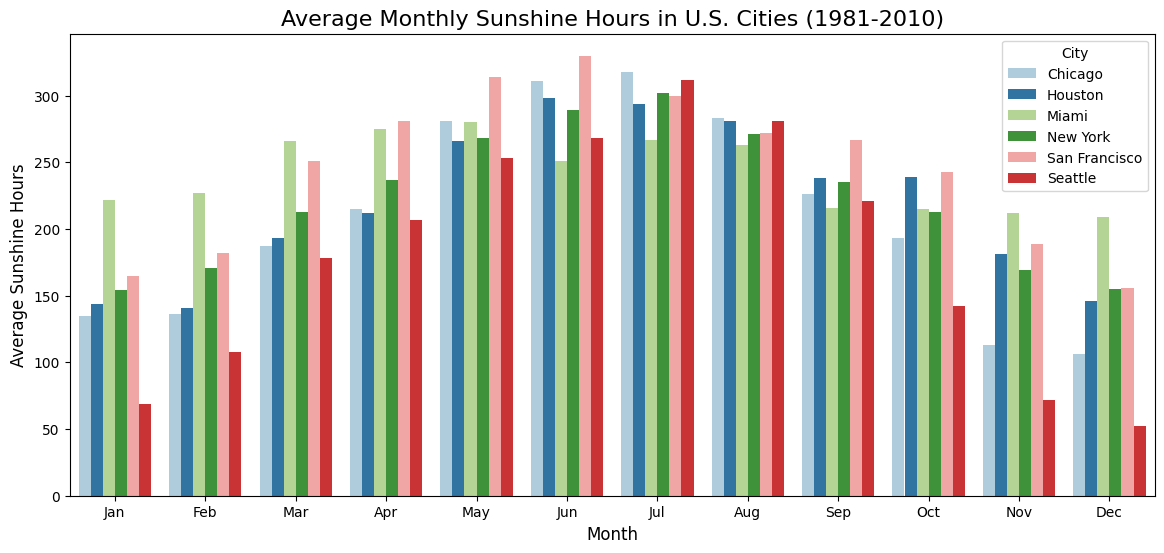

In [27]:
# Defining the order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Converting 'month' to a categorical type with the specified order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Creating a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='month', y='sunshine', hue='city', palette="Paired")

# Adding labels and title
plt.title('Average Monthly Sunshine Hours in U.S. Cities (1981-2010)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sunshine Hours', fontsize=12)
plt.legend(title='City')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

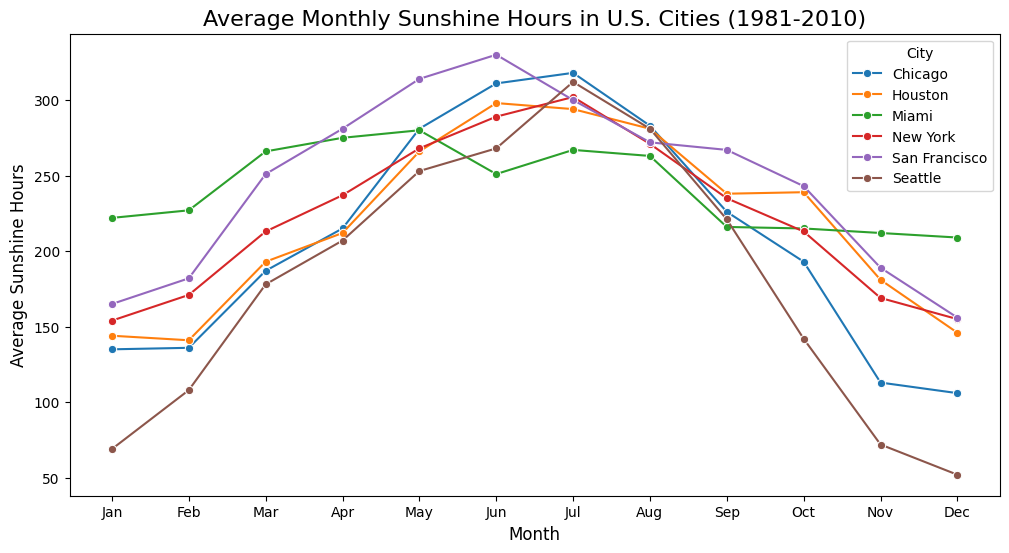

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='sunshine', hue='city', marker='o')

# Adding labels and title
plt.title('Average Monthly Sunshine Hours in U.S. Cities (1981-2010)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sunshine Hours', fontsize=12)
plt.legend(title='City')

plt.show()

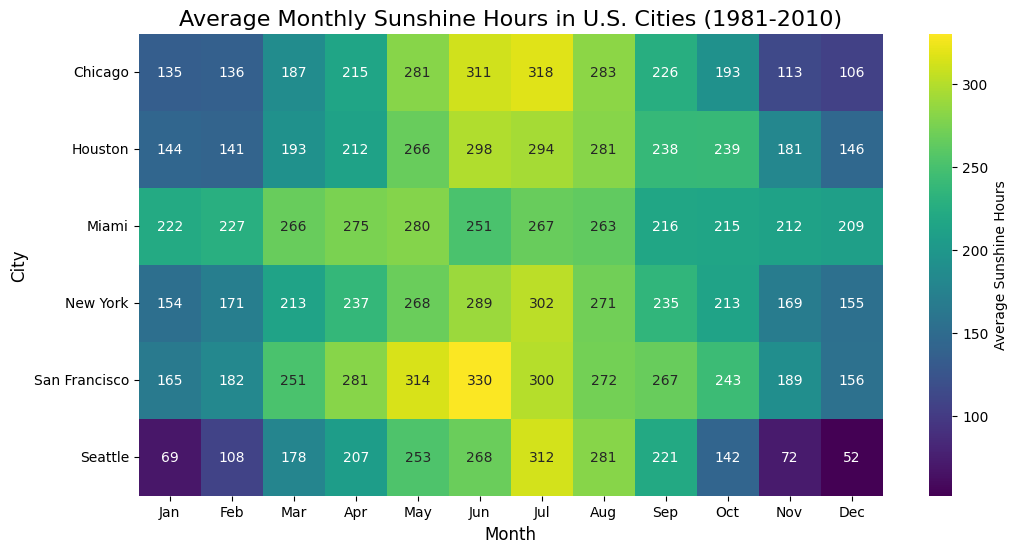

In [29]:
# Pivot the data for the heatmap
df_pivot = df.pivot(index='city', columns='month', values='sunshine')

# Defining the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the DataFrame to ensure months are in the correct order
df_pivot = df_pivot.reindex(columns=month_order)

# Creating a custom colormap from Viridis (darker to lighter)
viridis_colors = plt.cm.viridis(np.linspace(0, 1, 256))  # Get the viridis colors
cmap = mcolors.LinearSegmentedColormap.from_list("viridis_custom", viridis_colors[:-1])  # Reverse the order

# Creating heatmap using the custom colormap
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt="g", cbar_kws={'label': 'Average Sunshine Hours'})  # Using custom viridis colormap

# Adding labels and title
plt.title('Average Monthly Sunshine Hours in U.S. Cities (1981-2010)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('City', fontsize=12)

plt.show()